In [1]:
import pandas as pd

# Loading and Preprocessing Data

## Station Data

In [2]:
stations = pd.read_csv('data/raw/current_bluebikes_stations.csv', skiprows=1)
stations

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15
1,W32006,160 Arsenal St,42.364664,-71.175694,Watertown,Yes,11
2,A32019,175 N Harvard St,42.364475,-71.128408,Boston,Yes,17
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17
...,...,...,...,...,...,...,...
416,D32022,West End Park,42.365908,-71.064467,Boston,Yes,35
417,N32005,West Newton,42.349601,-71.226275,Newton,Yes,15
418,B32059,Whittier St Health Center,42.332863,-71.092189,Boston,Yes,19
419,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,23


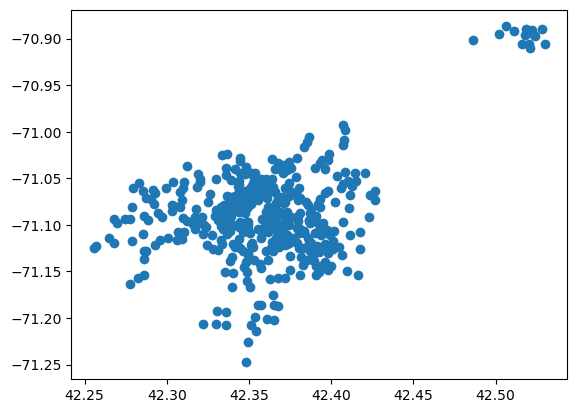

In [3]:
plt.scatter(stations['Latitude'], stations['Longitude'])
plt.show()

## Trip Data

The columns are different across different months...

In [4]:
trips = []
trip_columns = []
for y in range(2015, 2025):
    for m in range(1, 13):
        mo = '0' + str(m) if m < 10 else str(m)
        stem = str(y) + mo
        if stem == '202402':
            break
        trip = pd.read_csv(f'data/raw/{stem}-bluebikes-tripdata.csv')
        trips.append(trip)
        trip_columns.append(list(trip.columns))

Let's see when the columns change

In [5]:
differences = [0]
for i in range(len(trip_columns) - 1):
    if trip_columns[i] != trip_columns[i + 1]:
        print(f'Datasets at indices {i} and {i+1} have different columns!')
        differences.append(i+1)

Datasets at indices 63 and 64 have different columns!
Datasets at indices 98 and 99 have different columns!


Luckily, there appear to only be three different sets of columns. Let's look at them

In [6]:
for d in differences:
    display(trips[d].head())

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,Subscriber,1984,1
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,648,Subscriber,1985,1
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,555,Subscriber,1974,1
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1307,Subscriber,1987,1
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,177,Customer,1986,2


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,1577,2020-05-01 00:03:09.7400,2020-05-01 00:29:26.9630,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,3941,Customer,NaN
1,943,2020-05-01 00:04:13.1380,2020-05-01 00:19:56.3460,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,5,Northeastern University - North Parking Lot,42.341814,-71.090179,4469,Subscriber,02120
2,1521,2020-05-01 00:11:00.0640,2020-05-01 00:36:21.5300,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,344,Commonwealth Ave at Chiswick Rd,42.340246,-71.151688,3703,Subscriber,02135
3,891,2020-05-01 00:11:20.6610,2020-05-01 00:26:12.6180,205,Bowdoin St at Quincy St,42.307852,-71.065122,445,Geiger Gibson Community Health Center,42.318865,-71.045368,3726,Subscriber,02125
4,439,2020-05-01 00:28:07.6160,2020-05-01 00:35:27.2910,86,Brookline Village - Station Street at MBTA,42.332744,-71.116267,103,JFK Crossing at Harvard St. / Thorndike St.,42.346563,-71.128374,4862,Subscriber,02143


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0093AA5E7E3E0158,docked_bike,2023-04-13 13:49:59,2023-04-13 13:55:04,Innovation Lab - 125 Western Ave at Batten Way,A32011,Soldiers Field Park - 111 Western Ave,A32006,42.363713,-71.124598,42.364263,-71.118276,member
1,BFA8B88E063688F4,docked_bike,2023-04-25 09:44:38,2023-04-25 09:51:28,Museum of Science,M32045,One Broadway / Kendall Sq at Main St / 3rd St,M32003,42.367690,-71.071163,42.362242,-71.083111,member
2,A9C51FA200C31A81,docked_bike,2023-04-24 18:39:31,2023-04-24 18:58:05,New Balance - 20 Guest St,D32001,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,B32003,42.357329,-71.146735,42.337417,-71.102861,casual
3,0C1D451797FF0871,docked_bike,2023-04-04 19:25:31,2023-04-04 19:32:14,Museum of Science,M32045,Gore Street at Lambert Street,M32081,42.367690,-71.071163,42.373080,-71.086342,member
4,DDDCD0A2D2EE7A37,docked_bike,2023-04-11 08:36:14,2023-04-11 08:52:39,Museum of Science,M32045,Columbus Ave at W. Canton St,C32077,42.367690,-71.071163,42.344742,-71.076482,member


The differences between the first and second sets are that the first contains the users' birth year and gender, while the second one contains the postal code instead. There are major differences between the second and third sets, but some of the columns provide the same information while being named differently.

We'll combine the datasets using the first two sets of column names (because they are almost identical) and rename the columns to match the third set of column names.

In [7]:
trips_combined_1 = pd.concat(trips[differences[0]:differences[2] - 1]).rename(columns={
    'starttime': 'started_at',
    'stoptime': 'ended_at',
    'tripduration': 'duration',
    'start station id': 'start_station_id_old',
    'start station name': 'start_station_name',
    'start station latitude': 'start_lat',
    'start station longitude': 'start_lng',
    'end station id': 'end_station_id_old',
    'end station name': 'end_station_name',
    'end station latitude': 'end_lat',
    'end station longitude': 'end_lng'
})
for c in ['started_at', 'ended_at']:
    trips_combined_1[c] = pd.to_datetime(trips_combined_1[c])
trips_combined_1['usertype'] = trips_combined_1['usertype'].apply(lambda s: 'member' if s == 'Subscriber' else 'casual')
trips_combined_1

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,end_lng,bikeid,usertype,birth year,gender,postal code
0,542,2015-01-01 00:21:44.000,2015-01-01 00:30:47.000,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,member,1984,1.0,NaN
1,438,2015-01-01 00:27:03.000,2015-01-01 00:34:21.000,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,648,member,1985,1.0,NaN
2,254,2015-01-01 00:31:31.000,2015-01-01 00:35:46.000,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.36507,-71.1031,555,member,1974,1.0,NaN
3,432,2015-01-01 00:53:46.000,2015-01-01 01:00:58.000,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1307,member,1987,1.0,NaN
4,735,2015-01-01 01:07:06.000,2015-01-01 01:19:21.000,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,177,casual,1986,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152970,417,2023-02-28 23:57:36.922,2023-03-01 00:04:34.583,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,331,Huntington Ave at Mass Art,42.336586,-71.09887,3442,member,NaN,NaN,02120
152971,872,2023-02-28 23:58:06.895,2023-03-01 00:12:39.341,11,Longwood Ave at Binney St,42.338629,-71.106500,491,Harrison Ave at E. Dedham St,42.339194,-71.06975,2876,member,NaN,NaN,02446
152972,384,2023-02-28 23:58:20.949,2023-03-01 00:04:45.218,553,Cambridge Crossing at North First Street,42.371141,-71.076198,413,Kennedy-Longfellow School 158 Spring St,42.369553,-71.08579,6349,member,NaN,NaN,02141
152973,593,2023-02-28 23:58:36.547,2023-03-01 00:08:29.656,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,152,Ink Block - Harrison Ave at Herald St,42.345901,-71.063187,8277,member,NaN,NaN,33332


In [8]:
trips_combined_2 = pd.concat(trips[differences[2]:]).rename(columns={
    'start_station_id': 'start_station_id_new',
    'end_station_id': 'end_station_id_new'
})
for c in ['started_at', 'ended_at']:
    trips_combined_2[c] = pd.to_datetime(trips_combined_2[c])
trips_combined_2['duration'] = (pd.to_numeric(trips_combined_2['ended_at'] - trips_combined_2['started_at']) / 10e8).astype(int)
trips_combined_2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id_new,end_station_name,end_station_id_new,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,0093AA5E7E3E0158,docked_bike,2023-04-13 13:49:59,2023-04-13 13:55:04,Innovation Lab - 125 Western Ave at Batten Way,A32011,Soldiers Field Park - 111 Western Ave,A32006,42.363713,-71.124598,42.364263,-71.118276,member,305
1,BFA8B88E063688F4,docked_bike,2023-04-25 09:44:38,2023-04-25 09:51:28,Museum of Science,M32045,One Broadway / Kendall Sq at Main St / 3rd St,M32003,42.367690,-71.071163,42.362242,-71.083111,member,410
2,A9C51FA200C31A81,docked_bike,2023-04-24 18:39:31,2023-04-24 18:58:05,New Balance - 20 Guest St,D32001,HMS/HSPH - Avenue Louis Pasteur at Longwood Ave,B32003,42.357329,-71.146735,42.337417,-71.102861,casual,1114
3,0C1D451797FF0871,docked_bike,2023-04-04 19:25:31,2023-04-04 19:32:14,Museum of Science,M32045,Gore Street at Lambert Street,M32081,42.367690,-71.071163,42.373080,-71.086342,member,403
4,DDDCD0A2D2EE7A37,docked_bike,2023-04-11 08:36:14,2023-04-11 08:52:39,Museum of Science,M32045,Columbus Ave at W. Canton St,C32077,42.367690,-71.071163,42.344742,-71.076482,member,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166694,C77DAA204E19EF6A,classic_bike,2024-01-13 12:10:36,2024-01-13 12:42:42,Newmarket Square T Stop - Massachusetts Ave at...,C32022,Somerville City Hall Annex,S32036,42.326599,-71.066498,42.391898,-71.097454,member,1926
166695,77BC9B9BCAD3EBA6,classic_bike,2024-01-27 12:08:39,2024-01-27 12:45:33,Newmarket Square T Stop - Massachusetts Ave at...,C32022,Somerville City Hall Annex,S32036,42.326599,-71.066498,42.391898,-71.097454,member,2214
166696,C24A84547C47B792,electric_bike,2024-01-23 19:13:05,2024-01-23 19:20:42,Aquarium T Stop - 200 Atlantic Ave,B32004,Main St at Thompson Sq,D32038,42.360479,-71.050593,42.374878,-71.063835,member,457
166697,179B600DC22C66D7,classic_bike,2024-01-11 16:41:42,2024-01-11 17:12:00,55 Wheeler Street,M32088,Somerville City Hall Annex,S32036,42.390821,-71.143946,42.391898,-71.097454,member,1818


In [9]:
trips_combined = pd.concat([trips_combined_1, trips_combined_2], ignore_index=True)
chunksize = 500000
c = 1
for i in range(0, len(trips_combined), chunksize):
    trips_combined.iloc[i:i + chunksize].to_pickle(f'data/trips_combined/{c}.pkl')
    c += 1
trips_combined

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115.0,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,277.0,member,1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80.0,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,...,648.0,member,1985,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.36507,...,555.0,member,1974,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115.0,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,1307.0,member,1987,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105.0,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,...,177.0,casual,1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389103,1926,2024-01-13 12:10:36,2024-01-13 12:42:42,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,C77DAA204E19EF6A,classic_bike,C32022,S32036,member
20389104,2214,2024-01-27 12:08:39,2024-01-27 12:45:33,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,77BC9B9BCAD3EBA6,classic_bike,C32022,S32036,member
20389105,457,2024-01-23 19:13:05,2024-01-23 19:20:42,NaN,Aquarium T Stop - 200 Atlantic Ave,42.360479,-71.050593,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,C24A84547C47B792,electric_bike,B32004,D32038,member
20389106,1818,2024-01-11 16:41:42,2024-01-11 17:12:00,NaN,55 Wheeler Street,42.390821,-71.143946,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,179B600DC22C66D7,classic_bike,M32088,S32036,member
